In [1]:
import os
import shutil
import pandas as pd


In [59]:
df_2020 = pd.read_csv("D:\SHU\RESEARCH SKILLS AND DISSERTATION\Codes\ISIC\ISIC Train\ISIC_2020_Training_GroundTruth_v2.csv")

In [60]:
df_2020.head()

,image_name,patient_id,lesion_id,sex,age_approx,anatom_site_general_challenge,diagnosis,benign_malignant,target
0,ISIC_2637011,IP_7279968,IL_7972535,male,45.0,head/neck,unknown,benign,0
1,ISIC_0015719,IP_3075186,IL_4649854,female,45.0,upper extremity,unknown,benign,0
2,ISIC_0052212,IP_2842074,IL_9087444,female,50.0,lower extremity,nevus,benign,0
3,ISIC_0068279,IP_6890425,IL_4255399,female,45.0,head/neck,unknown,benign,0
4,ISIC_0074268,IP_8723313,IL_6898037,female,55.0,upper extremity,unknown,benign,0


In [61]:
df_2020.count()

image_name                       33126
patient_id                       33126
lesion_id                        33126
sex                              33061
age_approx                       33058
anatom_site_general_challenge    32599
diagnosis                        33126
benign_malignant                 33126
target                           33126
dtype: int64

In [62]:
df_2020.diagnosis.unique()

array(['unknown', 'nevus', 'melanoma', 'seborrheic keratosis',
       'lentigo NOS', 'lichenoid keratosis', 'solar lentigo',
       'cafe-au-lait macule', 'atypical melanocytic proliferation'],
      dtype=object)

In [63]:
df_2020 = df_2020.replace({
    'diagnosis': {
        'unknown': 'UNK',
        'nevus': 'NV',
        'melanoma': 'MEL',
        'seborrheic keratosis': 'BKL',
        'lentigo NOS': 'BKL',
        'lichenoid keratosis': 'BKL',
        'solar lentigo': 'BKL',
        'cafe-au-lait macule': 'UNK',
        'atypical melanocytic proliferation': 'UNK'
    }
})

In [64]:
df_2020.head()

,image_name,patient_id,lesion_id,sex,age_approx,anatom_site_general_challenge,diagnosis,benign_malignant,target
0,ISIC_2637011,IP_7279968,IL_7972535,male,45.0,head/neck,UNK,benign,0
1,ISIC_0015719,IP_3075186,IL_4649854,female,45.0,upper extremity,UNK,benign,0
2,ISIC_0052212,IP_2842074,IL_9087444,female,50.0,lower extremity,NV,benign,0
3,ISIC_0068279,IP_6890425,IL_4255399,female,45.0,head/neck,UNK,benign,0
4,ISIC_0074268,IP_8723313,IL_6898037,female,55.0,upper extremity,UNK,benign,0


In [65]:
df_2020 = df_2020.rename(columns= {
    'anatom_site_general_challenge': 'anatom_site_general',
    'image_name': 'image',
})

In [66]:
df_2020.head()

,image,patient_id,lesion_id,sex,age_approx,anatom_site_general,diagnosis,benign_malignant,target
0,ISIC_2637011,IP_7279968,IL_7972535,male,45.0,head/neck,UNK,benign,0
1,ISIC_0015719,IP_3075186,IL_4649854,female,45.0,upper extremity,UNK,benign,0
2,ISIC_0052212,IP_2842074,IL_9087444,female,50.0,lower extremity,NV,benign,0
3,ISIC_0068279,IP_6890425,IL_4255399,female,45.0,head/neck,UNK,benign,0
4,ISIC_0074268,IP_8723313,IL_6898037,female,55.0,upper extremity,UNK,benign,0


In [67]:
df_2020.diagnosis.unique()

array(['UNK', 'NV', 'MEL', 'BKL'], dtype=object)

In [68]:
df_2020.shape

(33126, 9)

In [69]:
df_2020.isna().sum()

image                    0
patient_id               0
lesion_id                0
sex                     65
age_approx              68
anatom_site_general    527
diagnosis                0
benign_malignant         0
target                   0
dtype: int64

In [70]:
print("Dataset")
print(df_2020.shape)
print('\n')

Dataset
(33126, 9)




In [72]:
files = [df_2020]
for dff in files:
    print(dff.info())
    print('\n')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 33126 entries, 0 to 33125
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   image                33126 non-null  object 
 1   patient_id           33126 non-null  object 
 2   lesion_id            33126 non-null  object 
 3   sex                  33061 non-null  object 
 4   age_approx           33058 non-null  float64
 5   anatom_site_general  32599 non-null  object 
 6   diagnosis            33126 non-null  object 
 7   benign_malignant     33126 non-null  object 
 8   target               33126 non-null  int64  
dtypes: float64(1), int64(1), object(7)
memory usage: 2.3+ MB
None




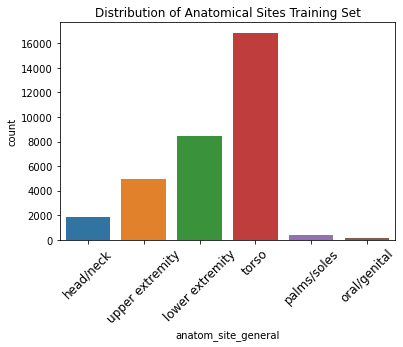

In [73]:
ax1 = sns.countplot(data=df_2020, x='anatom_site_general')
ax1.set_title('Distribution of Anatomical Sites Training Set')
ax1.tick_params(axis='x', labelrotation = 45, labelsize = 12)


In [74]:
z=df_2020.groupby(['sex','age_approx'])['anatom_site_general'].count().to_frame().reset_index()
z.style.background_gradient(cmap='Reds')  

,sex,age_approx,anatom_site_general
0,female,10.000000,10
1,female,15.000000,79
2,female,20.000000,292
3,female,25.000000,963
4,female,30.000000,1376
5,female,35.000000,1506
6,female,40.000000,1777
7,female,45.000000,1926
8,female,50.000000,2048
9,female,55.000000,1971


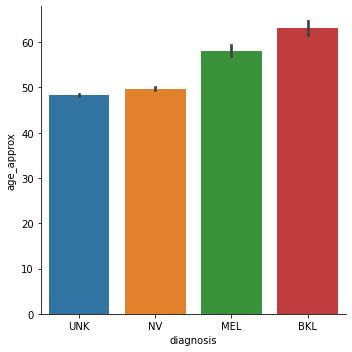

In [75]:
ax = sns.catplot(x="diagnosis",y="age_approx",data=df_2020,kind='bar')

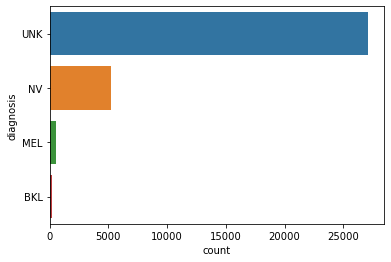

In [76]:
ax = sns.countplot(y="diagnosis",data=df_2020)

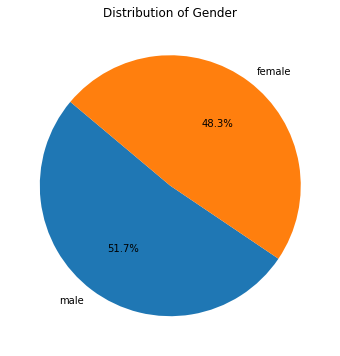

In [81]:
# Count occurrences of each gender
gender_counts = df_2020['sex'].value_counts()

# Create a pie chart with percentages
plt.figure(figsize=(6, 6))
plt.pie(gender_counts, labels=gender_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Distribution of Gender')
plt.show()

In [78]:
individuals_count = df_2020.groupby('patient_id').count()

individuals_count.head()


,image,lesion_id,sex,age_approx,anatom_site_general,diagnosis,benign_malignant,target
patient_id,,,,,,,,
IP_0001230,6,6,6,6,6,6,6,6
IP_0019713,13,13,13,13,13,13,13,13
IP_0036322,5,5,5,5,5,5,5,5
IP_0038436,3,3,3,3,3,3,3,3
IP_0038545,28,28,28,28,28,28,28,28


In [79]:
print('the mean number of images per patient is: {}'.format(round(individuals_count.image.mean(),2)))
print('the median number of images per patient is: {}'.format(round(individuals_count.image.median(),2)))
print('the standard deviation of the number of images per patient is: {}'.format(round(individuals_count.image.std(),2)))

the mean number of images per patient is: 16.11
the median number of images per patient is: 12.0
the standard deviation of the number of images per patient is: 15.67


In [2]:
# Path to the directory containing images
image_dir = r'D:\SHU\RESEARCH SKILLS AND DISSERTATION\Codes\ISIC\ISIC Train\train'


In [3]:
# Path to the CSV file
csv_file = r'D:\SHU\RESEARCH SKILLS AND DISSERTATION\Codes\ISIC\ISIC Train\ISIC_2020_Training_GroundTruth_v2.csv'

In [4]:

# Create separate directories for benign and malignant images
benign_dir = os.path.join(image_dir, 'benign')
malignant_dir = os.path.join(image_dir, 'malignant')

os.makedirs(benign_dir, exist_ok=True)
os.makedirs(malignant_dir, exist_ok=True)


In [4]:
# Read the CSV file
data = pd.read_csv(csv_file)

In [21]:
data.head()

,Filepath,Label
0,D:\SHU\RESEARCH SKILLS AND DISSERTATION\Codes\...,benign
1,D:\SHU\RESEARCH SKILLS AND DISSERTATION\Codes\...,malignant
2,D:\SHU\RESEARCH SKILLS AND DISSERTATION\Codes\...,benign
3,D:\SHU\RESEARCH SKILLS AND DISSERTATION\Codes\...,benign
4,D:\SHU\RESEARCH SKILLS AND DISSERTATION\Codes\...,benign


In [6]:
# Iterate through the CSV data and move images to respective folders
for index, row in data.iterrows():
    image_name = row['image_name']
    target = row['target']
    src_path = os.path.join(image_dir, image_name + '.jpg')
    
    if target == 0:
        dest_path = os.path.join(benign_dir, image_name + '.jpg')
    elif target == 1:
        dest_path = os.path.join(malignant_dir, image_name + '.jpg')
    else:
        continue
    
    # Move the image file to the respective folder
    if os.path.exists(src_path):
        shutil.move(src_path, dest_path)
    else:
        print(f"Image {image_name} not found.")

print("Images sorted into 'benign' and 'malignant' folders.")

Images sorted into 'benign' and 'malignant' folders.


In [5]:
import os, glob
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.callbacks import Callback,EarlyStopping
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.applications.resnet50 import preprocess_input
from sklearn.metrics import  classification_report

C:\Users\Hevin\anaconda3\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.26.2
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [6]:
file_path = r'D:\SHU\RESEARCH SKILLS AND DISSERTATION\Codes\ISIC\ISIC Train\train'

In [7]:
name_class = os.listdir(file_path)
name_class

['benign', 'malignant']

In [8]:
filepaths = list(glob.glob(file_path+'/**/*.*'))

In [9]:
filepaths

['D:\\SHU\\RESEARCH SKILLS AND DISSERTATION\\Codes\\ISIC\\ISIC Train\\train\\benign\\ISIC_0015719.jpg',
 'D:\\SHU\\RESEARCH SKILLS AND DISSERTATION\\Codes\\ISIC\\ISIC Train\\train\\benign\\ISIC_0052212.jpg',
 'D:\\SHU\\RESEARCH SKILLS AND DISSERTATION\\Codes\\ISIC\\ISIC Train\\train\\benign\\ISIC_0068279.jpg',
 'D:\\SHU\\RESEARCH SKILLS AND DISSERTATION\\Codes\\ISIC\\ISIC Train\\train\\benign\\ISIC_0074268.jpg',
 'D:\\SHU\\RESEARCH SKILLS AND DISSERTATION\\Codes\\ISIC\\ISIC Train\\train\\benign\\ISIC_0074311.jpg',
 'D:\\SHU\\RESEARCH SKILLS AND DISSERTATION\\Codes\\ISIC\\ISIC Train\\train\\benign\\ISIC_0074542.jpg',
 'D:\\SHU\\RESEARCH SKILLS AND DISSERTATION\\Codes\\ISIC\\ISIC Train\\train\\benign\\ISIC_0075663.jpg',
 'D:\\SHU\\RESEARCH SKILLS AND DISSERTATION\\Codes\\ISIC\\ISIC Train\\train\\benign\\ISIC_0075914.jpg',
 'D:\\SHU\\RESEARCH SKILLS AND DISSERTATION\\Codes\\ISIC\\ISIC Train\\train\\benign\\ISIC_0076262.jpg',
 'D:\\SHU\\RESEARCH SKILLS AND DISSERTATION\\Codes\\ISIC\\ISIC T

In [10]:
labels = list(map(lambda x: os.path.split(os.path.split(x)[0])[1], filepaths))
labels

['benign',
 'benign',
 'benign',
 'benign',
 'benign',
 'benign',
 'benign',
 'benign',
 'benign',
 'benign',
 'benign',
 'benign',
 'benign',
 'benign',
 'benign',
 'benign',
 'benign',
 'benign',
 'benign',
 'benign',
 'benign',
 'benign',
 'benign',
 'benign',
 'benign',
 'benign',
 'benign',
 'benign',
 'benign',
 'benign',
 'benign',
 'benign',
 'benign',
 'benign',
 'benign',
 'benign',
 'benign',
 'benign',
 'benign',
 'benign',
 'benign',
 'benign',
 'benign',
 'benign',
 'benign',
 'benign',
 'benign',
 'benign',
 'benign',
 'benign',
 'benign',
 'benign',
 'benign',
 'benign',
 'benign',
 'benign',
 'benign',
 'benign',
 'benign',
 'benign',
 'benign',
 'benign',
 'benign',
 'benign',
 'benign',
 'benign',
 'benign',
 'benign',
 'benign',
 'benign',
 'benign',
 'benign',
 'benign',
 'benign',
 'benign',
 'benign',
 'benign',
 'benign',
 'benign',
 'benign',
 'benign',
 'benign',
 'benign',
 'benign',
 'benign',
 'benign',
 'benign',
 'benign',
 'benign',
 'benign',
 'benign',

In [11]:

filepath = pd.Series(filepaths, name='Filepath').astype(str)
labels = pd.Series(labels, name='Label')
data = pd.concat([filepath, labels], axis=1)
data = data.sample(frac=1).reset_index(drop=True)
data.head(5)


,Filepath,Label
0,D:\SHU\RESEARCH SKILLS AND DISSERTATION\Codes\...,benign
1,D:\SHU\RESEARCH SKILLS AND DISSERTATION\Codes\...,malignant
2,D:\SHU\RESEARCH SKILLS AND DISSERTATION\Codes\...,benign
3,D:\SHU\RESEARCH SKILLS AND DISSERTATION\Codes\...,benign
4,D:\SHU\RESEARCH SKILLS AND DISSERTATION\Codes\...,benign


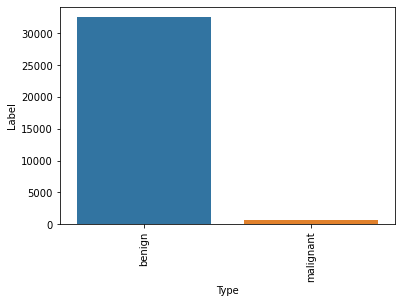

In [16]:
counts = data.Label.value_counts()
sns.barplot(x=counts.index, y=counts)
plt.xlabel('Type')
plt.xticks(rotation=90);

In [ ]:
import Augmentor
p = Augmentor.Pipeline("train/malignant")

p.rotate(probability=0.7, max_left_rotation=25, max_right_rotation=25)
p.zoom(probability=0.5, min_factor=1.1, max_factor=1.5)

p.sample(30000)

p.process()

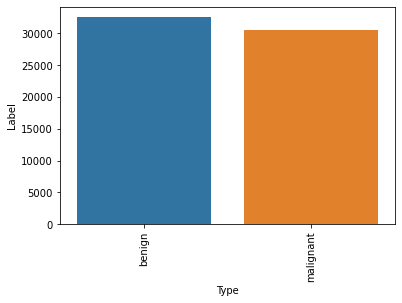

In [12]:
counts = data.Label.value_counts()
sns.barplot(x=counts.index, y=counts)
plt.xlabel('Type')
plt.xticks(rotation=90);

In [13]:
train, test = train_test_split(data, test_size=0.25, random_state=42)

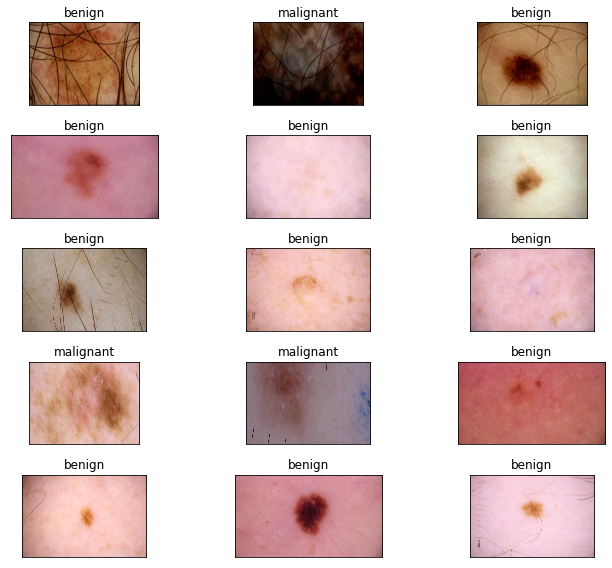

In [14]:
fig, axes = plt.subplots(nrows=5, ncols=3, figsize=(10,8), subplot_kw={'xticks':[],'yticks':[]})
for i, ax in enumerate(axes.flat):
    ax.imshow(plt.imread(data.Filepath[i]))
    ax.set_title(data.Label[i])
plt.tight_layout()
plt.show()

In [15]:
train_datagen = ImageDataGenerator(preprocessing_function=preprocess_input)
test_datagen = ImageDataGenerator(preprocessing_function=preprocess_input)

In [16]:
train_gen = train_datagen.flow_from_dataframe(
    dataframe=train,
    x_col='Filepath',
    y_col='Label',
    target_size=(100,100),
    class_mode='categorical',
    batch_size=32,
    shuffle=True,
    seed=42
)
valid_gen = train_datagen.flow_from_dataframe(
    dataframe=test,
    x_col='Filepath',
    y_col='Label',
    target_size=(100,100),
    class_mode='categorical',
    batch_size=32,
    shuffle=False,
    seed=42
)
test_gen = test_datagen.flow_from_dataframe(
    dataframe=test,
    x_col='Filepath',
    y_col='Label',
    target_size=(100,100),
    class_mode='categorical',
    batch_size=32,
    shuffle=False
)

Found 47344 validated image filenames belonging to 2 classes.
Found 15782 validated image filenames belonging to 2 classes.
Found 15782 validated image filenames belonging to 2 classes.


In [17]:
pretrained_model = ResNet50(
    input_shape=(100,100, 3),
    include_top=False,
    weights='imagenet',
    pooling='avg'
)

pretrained_model.trainable = False

In [18]:
inputs = pretrained_model.input

x = Dense(128, activation='relu')(pretrained_model.output)
x = Dense(128, activation='relu')(x)

outputs = Dense(2, activation='softmax')(x)

model = Model(inputs=inputs, outputs=outputs)

In [19]:
model.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

In [20]:
my_callbacks  = [EarlyStopping(monitor='val_accuracy',
                              min_delta=0,
                              patience=2,
                              mode='auto')]

In [22]:
history = model.fit(
    train_gen,
    validation_data=valid_gen,
    epochs=10
)

Epoch 1/10


1480/1480 [==============================] - 9361s 6s/step - loss: 0.2435 - accuracy: 0.8963 - val_loss: 0.1856 - val_accuracy: 0.9229
Epoch 2/10
1480/1480 [==============================] - 9353s 6s/step - loss: 0.1550 - accuracy: 0.9383 - val_loss: 0.1369 - val_accuracy: 0.9473
Epoch 3/10
1480/1480 [==============================] - 9323s 6s/step - loss: 0.1113 - accuracy: 0.9560 - val_loss: 0.1089 - val_accuracy: 0.9586
Epoch 4/10
1480/1480 [==============================] - 9336s 6s/step - loss: 0.0828 - accuracy: 0.9685 - val_loss: 0.0939 - val_accuracy: 0.9661
Epoch 5/10
1480/1480 [==============================] - 9311s 6s/step - loss: 0.0663 - accuracy: 0.9757 - val_loss: 0.1026 - val_accuracy: 0.9642
Epoch 6/10
1480/1480 [==============================] - 9311s 6s/step - loss: 0.0568 - accuracy: 0.9788 - val_loss: 0.1030 - val_accuracy: 0.9666
Epoch 7/10
1480/1480 [==============================] - 9326s 6s/step - loss: 0.0428 - accuracy: 0.9840 - val_loss: 0.0900

In [23]:
model.save("model_resnet50.h5") 

C:\Users\Hevin\anaconda3\lib\site-packages\keras\src\engine\training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


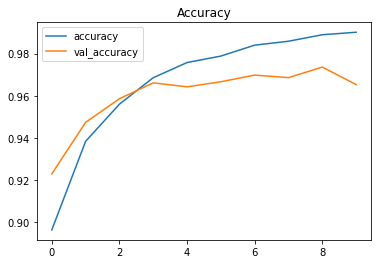

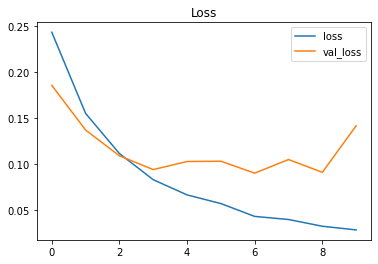

In [24]:
pd.DataFrame(history.history)[['accuracy','val_accuracy']].plot()
plt.title("Accuracy")
plt.show()

pd.DataFrame(history.history)[['loss','val_loss']].plot()
plt.title("Loss")
plt.show()

In [25]:
results = model.evaluate(test_gen, verbose=0)

print("    Test Loss: {:.5f}".format(results[0]))
print("Test Accuracy: {:.2f}%".format(results[1] * 100))

    Test Loss: 0.14161
Test Accuracy: 96.53%


In [26]:
# Predict the label of the test_gen
pred = model.predict(test_gen)
pred = np.argmax(pred,axis=1)

# Map the label
labels = (train_gen.class_indices)
labels = dict((v,k) for k,v in labels.items())
pred = [labels[k] for k in pred]

494/494 [==============================] - 2223s 4s/step


In [27]:
y_test = list(test.Label)

print(classification_report(y_test, pred))

              precision    recall  f1-score   support

      benign       0.99      0.94      0.97      8132
   malignant       0.94      0.99      0.97      7650

    accuracy                           0.97     15782
   macro avg       0.97      0.97      0.97     15782
weighted avg       0.97      0.97      0.97     15782



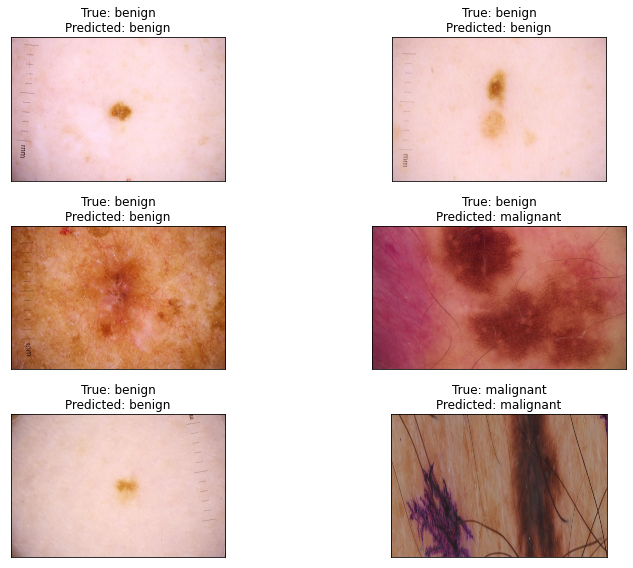

In [28]:
fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(12, 8),
                        subplot_kw={'xticks': [], 'yticks': []})

for i, ax in enumerate(axes.flat):
    ax.imshow(plt.imread(test.Filepath.iloc[i]))
    ax.set_title(f"True: {test.Label.iloc[i]}\nPredicted: {pred[i]}")
plt.tight_layout()
plt.show()

In [49]:
import cv2
import numpy as np
from matplotlib.pyplot import imread
from matplotlib.pyplot import imshow
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.imagenet_utils import decode_predictions
from tensorflow.keras.applications.imagenet_utils import preprocess_input

img_path = 'b1.jpg'

#img = image.load_img(img_path, target_size=(224, 224))
#x = img.img_to_array(img)

img = cv2.imread(img_path)
img = cv2.resize(img, (100, 100))

x = np.expand_dims(img, axis=0)
x = preprocess_input(x)
result = model.predict(x)
print((result*100).astype('int'))

#print('Input image shape:', x.shape)

#my_image = imread(img_path)
#imshow(my_image)


1/1 [==============================] - 0s 129ms/step
[[99  0]]


In [50]:
from tensorflow.keras.models import load_model
loaded_model_imageNet = load_model("model_resnet50.h5")
from tensorflow.keras.applications.resnet50 import preprocess_input, decode_predictions

In [51]:
import cv2
import numpy as np
from matplotlib.pyplot import imread
from matplotlib.pyplot import imshow
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.imagenet_utils import decode_predictions
from tensorflow.keras.applications.imagenet_utils import preprocess_input

img_path = 'b1.jpg'

#img = image.load_img(img_path, target_size=(224, 224))
#x = img.img_to_array(img)

img = cv2.imread(img_path)
img = cv2.resize(img, (100, 100))

x = np.expand_dims(img, axis=0)
x = preprocess_input(x)
result = loaded_model_imageNet.predict(x)
print((result*100).astype('int'))

#print('Input image shape:', x.shape)

#my_image = imread(img_path)
#imshow(my_image)


1/1 [==============================] - 1s 1s/step
[[99  0]]


In [52]:
p=list((result*100).astype('int'))
pp=list(p[0])
print(pp)

[99, 0]


In [53]:
print("Largest element is:", max(pp))

Largest element is: 99


In [54]:
index = pp.index(max(pp))

In [55]:
name_class=['benign', 'Melignant']

In [56]:
name_class[index]

'benign'

In [57]:
plt.imread(img_path)

array([[[186, 132, 130],
        [186, 132, 130],
        [185, 131, 129],
        ...,
        [189, 137, 141],
        [189, 137, 141],
        [189, 137, 141]],

       [[187, 133, 131],
        [186, 132, 130],
        [186, 132, 130],
        ...,
        [189, 137, 141],
        [189, 137, 141],
        [188, 136, 140]],

       [[187, 133, 131],
        [187, 133, 131],
        [186, 132, 130],
        ...,
        [190, 138, 142],
        [189, 137, 141],
        [188, 136, 140]],

       ...,

       [[154, 104,  97],
        [156, 106,  99],
        [158, 108, 101],
        ...,
        [163, 109, 109],
        [161, 107, 107],
        [160, 106, 106]],

       [[157, 107, 100],
        [157, 107, 100],
        [157, 107, 100],
        ...,
        [163, 109, 109],
        [161, 107, 107],
        [160, 106, 106]],

       [[160, 110, 103],
        [158, 108, 101],
        [156, 106,  99],
        ...,
        [163, 109, 109],
        [161, 107, 107],
        [160, 106, 106]]

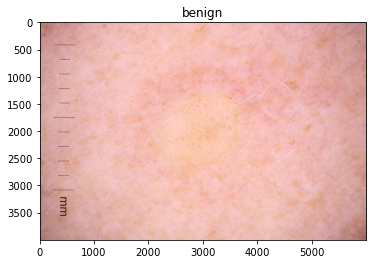

In [58]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
img = mpimg.imread(img_path)
imgplot = plt.imshow(img)
plt.title(name_class[index])
plt.show()